In [61]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset
data = pd.read_csv('C:/Users/RaymondCarpenter/Documents/GitHub/14thstreetanalytics/nfl-draft/ol_sheet.csv')


fields_not_normalized = [
'Height','Weight','Hand Size','Arm Length','Wonderlic','40 Yard Dash','Bench Press','Vertical','Broad Jump','Shuttle','3 Cone','60Yd Shuttle'
]


# Invert the scale for specific fields where lower is better
invert_fields = ['40 Yard Dash', 'Shuttle', '3 Cone', '60Yd Shuttle']
large_fixed_number = 10  # Adjust based on your dataset, should be larger than any value in the fields

for field in invert_fields:
    data[field] = large_fixed_number - data[field]

features = fields_not_normalized

# Fill missing values with the mean of each column
data_filled = data[features].fillna(data[features].mean(), inplace=False)

# Separate datasets
data_2024 = data[data['Draft Class'] == 2024]
data_not_2024 = data[data['Draft Class'] != 2024]

# Normalize the feature values using StandardScaler
scaler = StandardScaler()
data_2024_scaled = scaler.fit_transform(data_filled.loc[data_2024.index])
data_not_2024_scaled = scaler.transform(data_filled.loc[data_not_2024.index])

# Calculate cosine similarity
similarity = cosine_similarity(data_2024_scaled, data_not_2024_scaled)

# Input for a specific 2024 player's name
player_name = input("Enter the name of the 2024 player to compare: ")

try:
    player_index = data_2024[data_2024['Name'].str.lower() == player_name.lower()].index[0]
    similarity_scores = similarity[player_index - data_2024.index[0]]
    most_similar_index = similarity_scores.argmax()
    most_similar_player_name = data_not_2024.iloc[most_similar_index]['Name']
    percentage_similarity = (similarity_scores[most_similar_index] + 1) / 2 * 100

    print(f"\nThe most similar player to {player_name} is {most_similar_player_name} with {percentage_similarity:.2f}% similarity.\n")

    # Gather stats for comparison
    player_stats = data_filled.loc[data_2024.index][features].iloc[player_index - data_2024.index[0]]
    similar_player_stats = data_filled.loc[data_not_2024.index][features].iloc[most_similar_index]

    comparison_df = pd.DataFrame({
        player_name: player_stats.values,
        most_similar_player_name: similar_player_stats.values
    }, index=features)
    
    print(comparison_df)
except IndexError:
    print("Player not found in the 2024 draft class. Please check the name and try again.")



The most similar player to Joe Alt is Trevor Penning with 95.25% similarity.

                 Joe Alt  Trevor Penning
Height         80.750000       79.130000
Weight        321.000000      325.000000
Hand Size      10.000000       10.130000
Arm Length     34.250000       34.250000
Wonderlic      23.864865       23.864865
40 Yard Dash    4.950000        5.110000
Bench Press    25.071770       25.071770
Vertical       28.000000       28.000000
Broad Jump    112.000000      111.000000
Shuttle         5.490000        5.380000
3 Cone          2.690000        2.750000
60Yd Shuttle   -1.786667       -1.786667


In [68]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset
data = pd.read_csv('C:/Users/RaymondCarpenter/Documents/GitHub/14thstreetanalytics/nfl-draft/ol_sheet.csv')

fields_not_normalized = [
    'Height', 'Weight', 'Hand Size', 'Arm Length', 'Wonderlic', '40 Yard Dash',
    'Bench Press', 'Vertical', 'Broad Jump', 'Shuttle', '3 Cone', '60Yd Shuttle'
]

# Invert the scale for specific fields where lower is better
invert_fields = ['40 Yard Dash', 'Shuttle', '3 Cone', '60Yd Shuttle']
large_fixed_number = 10  # Adjust based on your dataset, should be larger than any value in the fields

for field in invert_fields:
    data[field] = large_fixed_number - data[field]

# Input for a specific 2024 player's name
player_name = input("Enter the name of the 2024 player to compare: ")
player_data = data[data['Draft Class'] == 2024]
player_row = player_data[player_data['Name'].str.lower() == player_name.lower()]

if player_row.empty:
    print("Player not found in the 2024 draft class. Please check the name and try again.")
else:
    # Find non-empty features for this player
    non_empty_features = [field for field in fields_not_normalized if not player_row[field].isna().all()]
    
    # Filter the dataset to only include rows where these features are not null
    data_filtered = data.dropna(subset=non_empty_features)
    
    # Separate datasets
    data_2024 = data_filtered[data_filtered['Draft Class'] == 2024]
    data_not_2024 = data_filtered[data_filtered['Draft Class'] != 2024]
    
    # Normalize the feature values using StandardScaler
    scaler = StandardScaler()
    data_2024_scaled = scaler.fit_transform(data_2024[non_empty_features])
    data_not_2024_scaled = scaler.transform(data_not_2024[non_empty_features])
    
    # Calculate cosine similarity
    similarity = cosine_similarity(data_2024_scaled, data_not_2024_scaled)
    player_index = data_2024[data_2024['Name'].str.lower() == player_name.lower()].index[0]
    similarity_scores = similarity[player_index - data_2024.index[0]]
    most_similar_index = similarity_scores.argmax()
    most_similar_player_name = data_not_2024.iloc[most_similar_index]['Name']
    percentage_similarity = (similarity_scores[most_similar_index] + 1) / 2 * 100
    
    print(f"\nThe most similar player to {player_name} is {most_similar_player_name} with {percentage_similarity:.2f}% similarity.\n")
    
    # Gather stats for comparison
    player_stats = data_filtered.loc[data_2024.index][non_empty_features].iloc[player_index - data_2024.index[0]]
    similar_player_stats = data_filtered.loc[data_not_2024.index][non_empty_features].iloc[most_similar_index]
    
    comparison_df = pd.DataFrame({
        player_name: player_stats.values,
        most_similar_player_name: similar_player_stats.values
    }, index=non_empty_features)
    
    print(comparison_df)



The most similar player to Taliese Fuaga is Devin Clark with 94.93% similarity.

              Taliese Fuaga  Devin Clark
Height                76.00        75.63
Weight               315.00       305.00
Hand Size              9.00         9.00
Arm Length            33.88        33.75
40 Yard Dash           4.78         4.64
Vertical              24.50        21.00
Broad Jump           102.00        94.00


The most similar player to Anim Dankwah is Ben Braden with a similarity score of 0.99.


<ipython-input-7-94716b410fcc>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[percentile_col_name] = df[feature].rank(pct=True)
<ipython-input-7-94716b410fcc>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[percentile_col_name] = df[feature].rank(pct=True)
<ipython-input-7-94716b410fcc>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

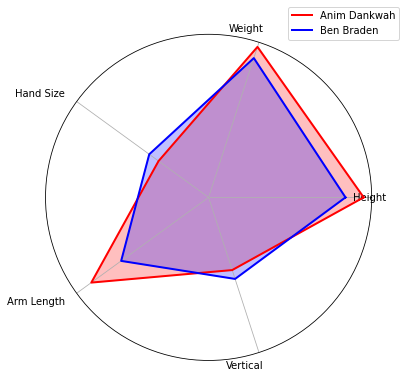

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from math import pi

# Load dataset
data = pd.read_csv('C:/Users/RaymondCarpenter/Documents/GitHub/14thstreetanalytics/nfl-draft/ol_sheet.csv')

fields_not_normalized = [
    'Height', 'Weight', 'Hand Size', 'Arm Length', 'Wonderlic', 
    '40 Yard Dash', 'Bench Press', 'Vertical', 'Broad Jump', 'Shuttle', 
    '3 Cone', '60Yd Shuttle'
]

# Invert the scale for fields where lower is better
invert_fields = ['40 Yard Dash', 'Shuttle', '3 Cone', '60Yd Shuttle']
large_fixed_number = 10  # Should be larger than any value in the fields

for field in invert_fields:
    data[field] = large_fixed_number - data[field]

player_name = input("Enter the name of the 2024 player to compare: ")
player_data = data[data['Draft Class'] == 2024]
player_row = player_data[player_data['Name'].str.lower() == player_name.lower()].iloc[0]

if player_row.empty:
    print("Player not found in the 2024 draft class. Please check the name and try again.")
else:
    # Find non-empty features for this player
    non_empty_features = [field for field in fields_not_normalized if not pd.isna(player_row[field])]
    
    # Filter out players missing any of these non-empty features
    data_filtered = data.dropna(subset=non_empty_features)
    
    # Calculate percentiles only for these features
    def calculate_percentiles(df, features):
        for feature in features:
            percentile_col_name = f'{feature} Percentile'
            df[percentile_col_name] = df[feature].rank(pct=True)
        return df

    data_filtered = calculate_percentiles(data_filtered, non_empty_features)
    
    # Normalize the feature values using StandardScaler
    scaler = StandardScaler()
    data_filtered[non_empty_features] = scaler.fit_transform(data_filtered[non_empty_features])

    data_2024_scaled = data_filtered[data_filtered['Draft Class'] == 2024]
    data_not_2024_scaled = data_filtered[data_filtered['Draft Class'] != 2024]

    # Calculate cosine similarity
    similarity = cosine_similarity(data_2024_scaled[non_empty_features], data_not_2024_scaled[non_empty_features])
    player_index = data_2024_scaled.index.get_loc(player_row.name)  # Get location in filtered data
    similarity_scores = similarity[player_index]
    most_similar_index = similarity_scores.argmax()
    most_similar_player_name = data_not_2024_scaled.iloc[most_similar_index]['Name']
    
    print(f"The most similar player to {player_name} is {most_similar_player_name} with a similarity score of {similarity_scores[most_similar_index]:.2f}.")

    # Prepare data for the radar chart
    percentile_features = [f'{feature} Percentile' for feature in non_empty_features]
    player_percentiles = data_2024_scaled.loc[player_row.name, percentile_features]
    similar_player_percentiles = data_not_2024_scaled.iloc[most_similar_index][percentile_features]

    labels = np.array([feature.replace(' Percentile', '') for feature in percentile_features])
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1] 

    player_stats = player_percentiles.tolist() + player_percentiles.tolist()[:1]
    similar_player_stats = similar_player_percentiles.tolist() + similar_player_percentiles.tolist()[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.fill(angles, player_stats, color='red', alpha=0.25)
    ax.fill(angles, similar_player_stats, color='blue', alpha=0.25)
    ax.plot(angles, player_stats, color='red', linewidth=2, label=player_name)
    ax.plot(angles, similar_player_stats, color='blue', linewidth=2, label=most_similar_player_name)
    
    ax.set_xticks(angles[:-1])
    
    ax.set_xticklabels(labels, rotation=45, ha="right")
    ax.set_yticks([])  # Removes radial gridlines

    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.show()


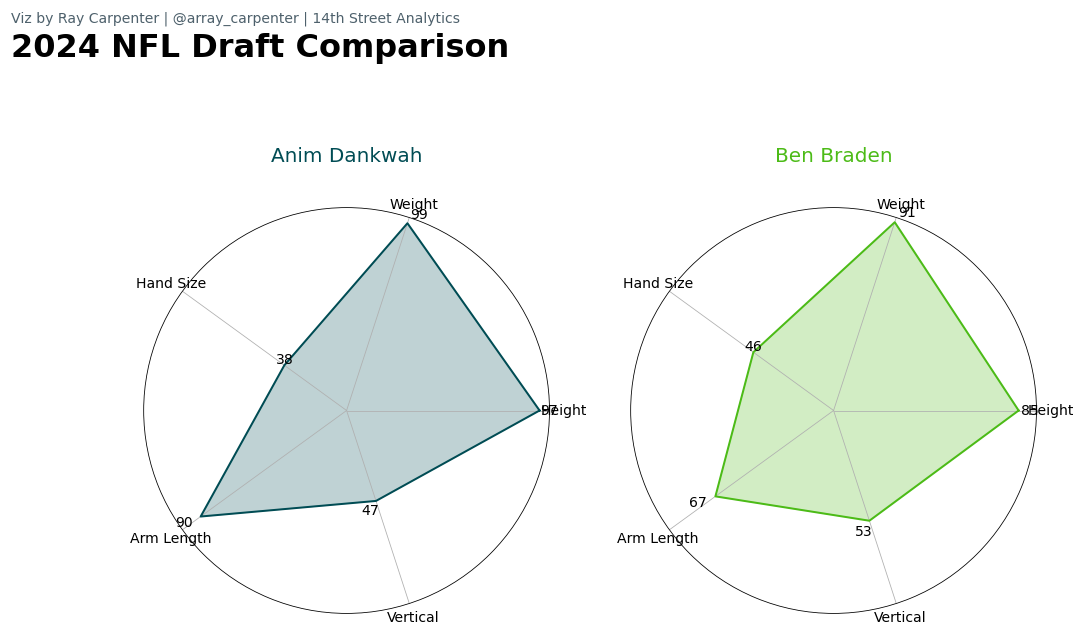

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from matplotlib.gridspec import GridSpec
from highlight_text import fig_text

def make_radar_chart(name, stats, feature_names, ax, fill_color, line_color):
    num_vars = len(feature_names)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    stats += stats[:1]
    angles += angles[:1]
    ax.fill(angles, stats, color=fill_color, alpha=0.25)
    ax.plot(angles, stats, color=line_color, linewidth=2)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(feature_names, fontsize=14)
    ax.set_title(name, size=20, color=line_color, y=1.1)
    for label, angle, stat in zip(feature_names, angles[:-1], stats[:-1]):
        ha = 'center' if angle in (0, pi) else 'left' if 0 < angle < pi else 'right'
        ax.text(angle, stat + 0.05, f"{int(stat*100)}", size=14, horizontalalignment=ha, verticalalignment="center")
    ax.set_yticks([])

# Creating a figure with a custom layout using GridSpec.
fig = plt.figure(figsize=(16, 10), facecolor='white')
gs = GridSpec(5, 2, fig)

# Allocating specific axes for the radar charts.
ax1 = fig.add_subplot(gs[1:, 0], polar=True)
ax2 = fig.add_subplot(gs[1:, 1], polar=True)

# Use fig_text or plt.text to add text in the reserved area.
fig_text(
    x=0.01, y=0.95, 
    s="2024 NFL Draft Comparison", 
    va="top", ha="left",
    fontsize=32, color="black", weight="bold",
    fig=fig
)
fig_text(
    x=0.01, y=.98, 
    s="Viz by Ray Carpenter | @array_carpenter | 14th Street Analytics",
    va="top", ha="left",
    fontsize=14, color="#4E616C",
    fig=fig
)

player_color = '#004C54'
similar_player_color = '#4CBB17'


make_radar_chart(player_name, player_percentiles.tolist(), labels, ax1, fill_color=player_color, line_color=player_color)
make_radar_chart(most_similar_player_name, similar_player_percentiles.tolist(), labels, ax2, fill_color=similar_player_color, line_color=similar_player_color)

plt.show()